<a href="https://colab.research.google.com/github/ninemoonz/deepLearning/blob/main/autoencoder_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Reshape

#Random seed fixing
SEED=12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [2]:
from tensorflow.keras import datasets
fashion_mnist = datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

# feature scaling
x_train = x_train /255.
x_test = x_test / 255.

# dimension 
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [6]:
def Autoencoder():

  model = Sequential()

  #Encoder part
  model.add(Conv2D(filters=16, kernel_size=(3,3),
                   activation='relu', input_shape=[28, 28, 1]))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))

  # Decoder part
  model.add(Dense(units=28*28, activation='sigmoid'))
  model.add(Reshape([28,28]))

  #Compile
  model.compile(optimizer='adam', loss='mean_squared_error')
  return model 

ae_model = Autoencoder()
ae_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2704)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                173120    
                                                                 
 dense_5 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                      

In [14]:
history = ae_model.fit(x_train, x_train, batch_size=64, epochs=20, validation_data=(x_test, x_test), verbose=0)

ae_image = ae_model.predict(x_test)
ae_image.shape

(10000, 28, 28)

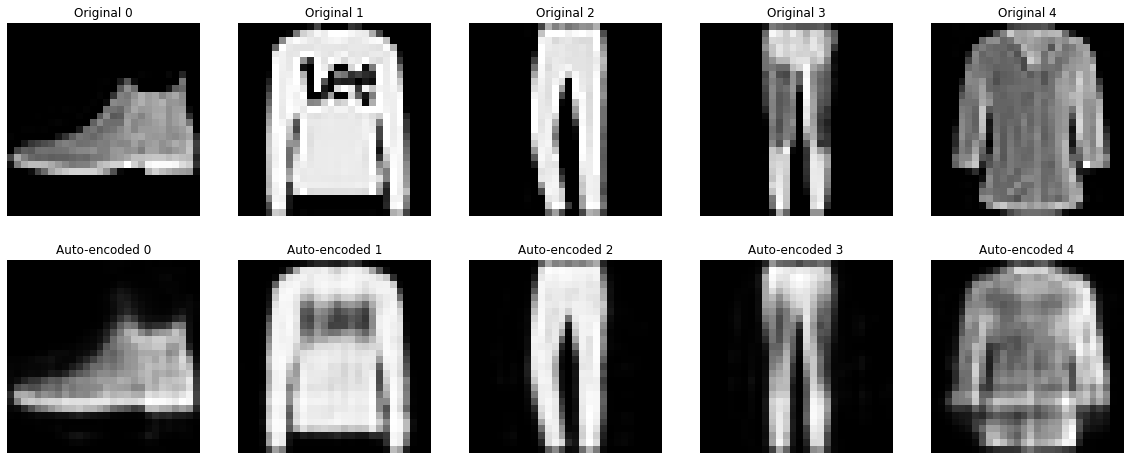

In [10]:
num = 5
plt.figure(figsize=(20, 8))

for i in range(num):
  #original image
  ax = plt.subplot(2, num, i + 1)
  plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
  plt.title("Original %s"%str(i))
  plt.axis('off')

  # 복원 이미지
  ax = plt.subplot(2, num, i + num + 1)
  plt.imshow(ae_image[i], cmap='gray')
  plt.title("Auto-encoded %s"%str(i))
  plt.axis('off')

plt.show()
